<a href="https://colab.research.google.com/github/rafaelrubo/python-geociencias/blob/main/python_geociencias05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Aplicado às Geociências
##Parte 05
#####Rafael Rubo
#####rafaelrubo@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulando dados de densidade de rochas ​
np.random.seed(42)
data = pd.DataFrame({'densidade': np.random.normal(loc=2.65, scale=0.1, size=100)})
# DataFrame do pandas com uma única coluna chamada densidade, cujos valores são gerados aleatoriamente a partir de uma distribuição normal (Gaussiana)
# loc: Média da distribuição (μ)
# scale: Desvio padrão (σ)
# size: Número de valores a gerar

/tmp/ipython-input-3769592319.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(stats.index[1:], rotation=45)


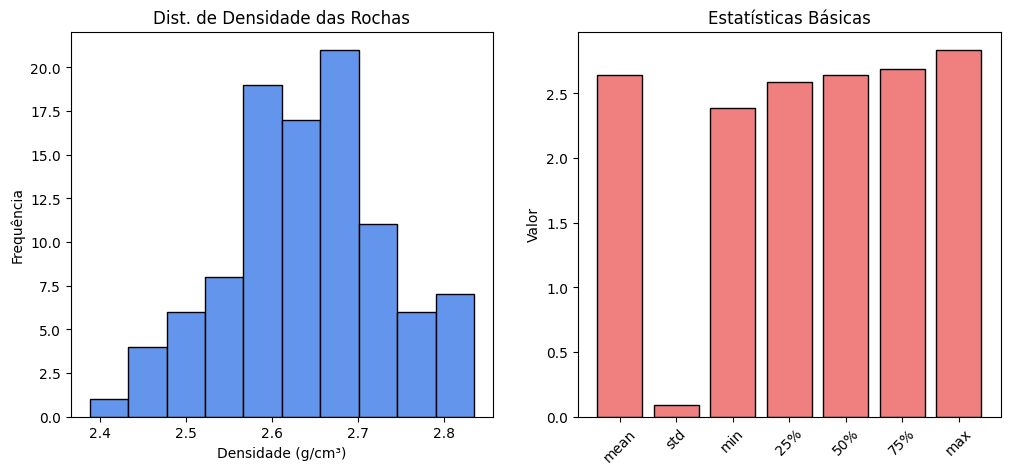

In [ ]:
# Criando histograma ​
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(data['densidade'], bins=10, color='cornflowerblue', edgecolor='black')
ax[0].set_title("Dist. de Densidade das Rochas")
ax[0].set_xlabel("Densidade (g/cm³)")
ax[0].set_ylabel("Frequência")

# Exibindo estatísticas descritivas  ​
stats = data['densidade'].describe()
ax[1].bar(stats.index[1:], stats.values[1:], color='lightcoral', edgecolor='black')
ax[1].set_title("Estatísticas Básicas")
ax[1].set_ylabel("Valor")
ax[1].set_xticklabels(stats.index[1:], rotation=45)
plt.show()

In [ ]:
# Dados simulados de propriedades geológicas​
np.random.seed(0)

# Profundidade entre 1000m e 3000m​
profundidade = np.linspace(1000, 3000, 50)

# Densidade aumenta com profundidade​
densidade = 2.2 + 0.0003 * profundidade + np.random.normal(0, 0.02, 50)
# modelo crescente da densidade com a profundidade
# ruído aleatório com média 0 e desvio padrão 0.02, para simular variações naturais nas medições

# Criando o DataFrame​
data = pd.DataFrame({
'Profundidade (m)': profundidade,
'Densidade (g/cm³)': densidade
})

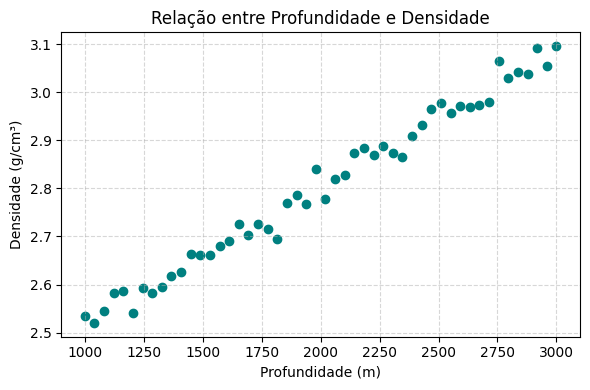

In [ ]:
# Gráfico de dispersão​
plt.figure(figsize=(6, 4))
plt.scatter(data['Profundidade (m)'], data['Densidade (g/cm³)'], color='teal')
plt.title('Relação entre Profundidade e Densidade')
plt.xlabel('Profundidade (m)')
plt.ylabel('Densidade (g/cm³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Adicionando mais variáveis simuladas​

data['Porosidade (%)'] = np.clip(30 - 0.005 * data['Profundidade (m)'] + np.random.normal(0, 0.5, 50), 5, 30)
# modelo decrescente da porosidade com a profundidade
# ruído aleatório com média 0 e desvio padrão 0.5, para simular variações naturais nas medições
# limita os valores finais para que fiquem entre 5 e 30

data['Permeabilidade (mD)'] = np.clip(500 - 0.1 * data['Profundidade (m)'] + np.random.normal(0, 20, 50), 50, 500)
# modelo decrescente da permeabilidade com a profundidade
# ruído aleatório com média 0 e desvio padrão 20, para simular variações naturais nas medições
# limita os valores finais para que fiquem entre 50 e 500

# Calculando a matriz de correlação​
corr = data.corr()

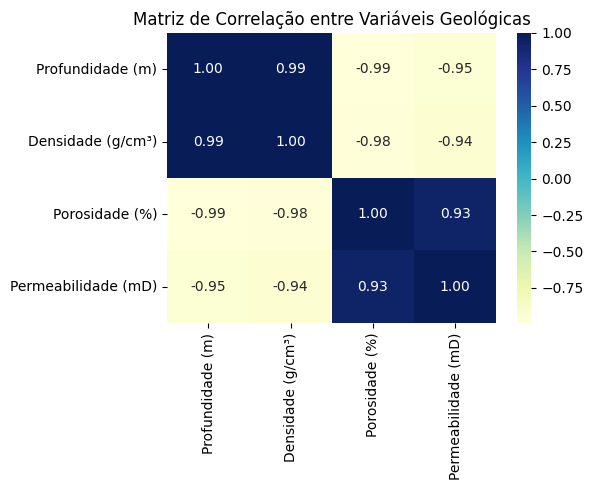

In [ ]:
# Plotando o mapa de calor​

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Geológicas')
plt.tight_layout()
plt.show()